In [1]:
# import necessary libraries
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Nodes:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

Nodes connected?
True

Nodes and Edge weights:
0 3 16
0 8 24
0 12 27
0 14 15
0 16 46
0 23 2
0 29 34
0 31 25
0 32 31
0 33 9
0 35 13
0 37 14
0 40 32
0 41 10
0 44 19
0 48 12
0 51 11
0 54 29
0 55 20
0 57 32
0 58 28
0 62 25
0 68 19
0 71 30
0 76 33
0 83 41
0 91 20
0 93 7
0 96 32
0 97 46
0 98 8
0 99 48
1 5 10
1 9 39
1 12 14
1 15 16
1 16 14
1 25 48
1 27 47
1 33 7
1 37 8
1 41 47
1 44 23
1 48 15
1 51 31
1 57 30
1 59 21
1 60 32
1 66 11
1 67 43
1 69 18
1 74 15
1 75 48
1 77 41
1 78 10
1 83 18
1 97 10
2 3 19
2 13 5
2 19 39
2 20 40
2 22 19
2 24 42
2 28 34
2 31 15
2 35 3
2 37 34
2 40 7
2 42 3
2 52 7
2 56 49
2 

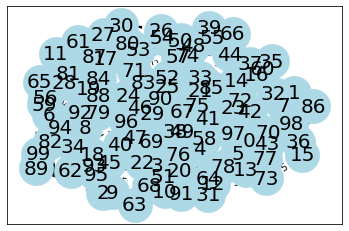

In [2]:
# Create graph with 10 nodes
seed=1000  
BaseGraph= nx.gnp_random_graph (100, .3, seed=seed )
print("Nodes:")
print(BaseGraph.nodes())

print()
print("Nodes connected?")
print(nx.is_connected(BaseGraph))

# Assign random weights to edges
print()
print("Nodes and Edge weights:")
for (u, v) in BaseGraph.edges():
    eweights=BaseGraph.edges[u,v]['weight'] = random.randint(1,50)
    print(u,v,eweights)

# some properties
print()
print("node degree and node clustering")
for v in nx.nodes(BaseGraph):
    print(f"{v} {nx.degree(BaseGraph, v)} {nx.clustering(BaseGraph, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(BaseGraph):
    print(line)

links = [(u, v) for (u, v, d) in BaseGraph.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(BaseGraph) 
nx.draw_networkx_nodes(BaseGraph, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(BaseGraph, pos, edgelist=links, width=4)                                 # draw edges

# node labels
nx.draw_networkx_labels(BaseGraph, pos, font_size=20, font_family="sans-serif")

# edge weight labels
print()
print('Graph:')
edge_labels = nx.get_edge_attributes(BaseGraph, "weight")
print(edge_labels)

#plot the graph
nx.draw_networkx_edge_labels(BaseGraph, pos, edge_labels)
print()
plt.show()

In [3]:
#calculate base weights of the graph
def calculateBaseWeights(hrsNow,minNow):
  percWeights = {}
  ModifiedGraph['Graph at '+hrsNow+minNow] = [BaseGraph.copy()]
  for (u,v) in ModifiedGraph['Graph at '+hrsNow+minNow][0].edges:
    b = baseLevelTable[hrsNow]
    p = random.normalvariate(0,0.25)
    percWeights[u,v] = round(abs(b*p*(BaseGraph.edges[u,v]['weight'])),2)
    # storing graph at all times using dictionary
    ModifiedGraph['Graph at '+hrsNow+minNow][0].edges[u,v]['weight'] = round(BaseGraph.edges[u,v]['weight'] + percWeights[u,v],2)
  # also storing their % weight changes for comparison
  ModifiedGraph['Graph at '+hrsNow+minNow].append(percWeights)

In [4]:
#generate vehicles with random source and destination
def generate_S_D(veh_Count):
  # ten vehicles for every 15 mins
  for i in range(1,11):
    x=[]
    source = random.randint(0,99)
    destination = random.randint(0,99)
    # for avoiding same source and destination nodes 
    while(source==destination):
      destination = random.randint(0,99)
    x = (source,destination)
    veh_Count+=1
    # store each vehicle info in a dictionary
    vehiclesArr['V'+ str(veh_Count)] = {'(S,D)':x}

In [5]:
 #calculate shortest paths
def calculateShortestPath(hrsNow,minNow):
  totJrnyTime = 0
  for i in vehiclesArr:
    tWeights = []
    pWeights = []
    graphT = ModifiedGraph['Graph at '+hrsNow+minNow]
    # If it is a new vehicle, shoretst path won't be there
    if 'Shortest Path' not in vehiclesArr[i].keys():
      vehiclesArr[i]['Shortest Path'] = nx.shortest_path(graphT[0],vehiclesArr[i]['(S,D)'][0],vehiclesArr[i]['(S,D)'][1],weight='weight',method='dijkstra')
      s_path = vehiclesArr[i]['Shortest Path']
      # store edge weights. and % weight changes
      for p in range(0,len(s_path)-1):
        if (s_path[p],s_path[p+1]) in graphT[1]:
          pWeights.append(graphT[1][(s_path[p],s_path[p+1])])
          tWeights.append(graphT[0].edges[(s_path[p],s_path[p+1])]['weight'])
        elif (s_path[p+1],s_path[p]) in graphT[1]:
          pWeights.append(graphT[1][(s_path[p+1],s_path[p])])
          tWeights.append(graphT[0].edges[s_path[p+1],s_path[p]]['weight'])
      vehiclesArr[i]['Edge weights'] = tWeights
      vehiclesArr[i]['% Weight Changes'] = pWeights
      vehiclesArr[i]['Vehicle Total Time'] = round(sum(tWeights),2)
      vehiclesArr[i]['Time interval'] = 15
    # if vehicle is already existing 
    elif(vehiclesArr[i]['Time interval']<vehiclesArr[i]['Vehicle Total Time']):
      sum_Wei=0
      pCW=vehiclesArr[i]['% Weight Changes']
      totPerInc = 0
      N=0
      tCW = vehiclesArr[i]['Edge weights']
      for j in range(len(tCW)):
        sum_Wei+=tCW[j]
        # if vehicle didn't completed its journey
        if(sum_Wei>vehiclesArr[i]['Time interval']):
          # N - node that vehicle doesn't visited so far
          N=j+1
          if(N<len(tCW)):   
            # previous each edge % weight change of the shoretst path 
            prev_sPath = vehiclesArr[i]['Shortest Path']       
            prev_pCW = vehiclesArr[i]['% Weight Changes'][N:]
            # current each edge % weight change of the shoretst path
            cur_pCW = []
            for p in range(N,len(tCW)):
              if (prev_sPath[p],prev_sPath[p+1]) in graphT[1]:
                cur_pCW.append(graphT[1][(prev_sPath[p],prev_sPath[p+1])])
              elif (prev_sPath[p+1],prev_sPath[p]) in graphT[1]:
                cur_pCW.append(graphT[1][(prev_sPath[p+1],prev_sPath[p])])
            
            # difference between current and previous overall % weight change
            totPerInc = (sum(cur_pCW)/len(cur_pCW)) - (sum(prev_pCW)/len(prev_pCW))
          break
      # if the difference is greater than 5 
      if(totPerInc>5):
        M=0
        for k in range(N,len(pCW)):
          # search for edge whose %weight change >5
          if(pCW[k]>5):
            M=k
            # recalculate shoretst path from M
            qPath = nx.shortest_path(graphT[0],vehiclesArr[i]['Shortest Path'][M],vehiclesArr[i]['(S,D)'][1],weight='weight',method='dijkstra')
            vehiclesArr[i]['Shortest Path'][M:] = qPath
            
            # update each edge weight and %weight change from node M
            s_path = vehiclesArr[i]['Shortest Path']
            for p in range(M,len(s_path)-1):
              if (s_path[p],s_path[p+1]) in graphT[1]:
                pWeights.append(graphT[1][(s_path[p],s_path[p+1])])
                tWeights.append(graphT[0].edges[(s_path[p],s_path[p+1])]['weight'])
              elif (s_path[p+1],s_path[p]) in graphT[1]:
                pWeights.append(graphT[1][(s_path[p+1],s_path[p])])
                tWeights.append(graphT[0].edges[s_path[p+1],s_path[p]]['weight'])
            vehiclesArr[i]['Edge weights'][M:] = tWeights
            vehiclesArr[i]['% Weight Changes'][M:] = pWeights
            # each vehicles total travel time
            vehiclesArr[i]['Vehicle Total Time'] = round(sum(vehiclesArr[i]['Edge weights']),2)
            break;
      # time interval for comparing how much time has already passed since the vehicle started its journey
      vehiclesArr[i]['Time interval'] +=15

    # if vehicle completed its journey      
    elif(vehiclesArr[i]['Time interval']>vehiclesArr[i]['Vehicle Total Time']):
      vehiclesArr[i]['Time interval'] = vehiclesArr[i]['Vehicle Total Time']
      #store total journey time
      totJrnyTime = vehiclesArr[i]['Vehicle Total Time']
    else:
      continue
  # and return it for adding to all vehicles total journey time
  return totJrnyTime

In [6]:
baseLevelTable = {'12AM':0.1,'01AM':0.1,'02AM':0.1,'03AM':0.15,'04AM':0.25,'05AM':0.3,'06AM':0.65,'07AM':0.85,
                  '08AM':1.0,'09AM':0.95,'10AM':0.9,'11AM':0.9,'12PM':0.9,'01PM':0.9,'02PM':0.95,'03PM':0.95,
                  '04PM':0.9,'05PM':1.0,'06PM':1.0,'07PM':0.85,'08PM':0.7,'09PM':0.6,'10PM':0.45,'11PM':0.3,} 
# store all vehicle details
vehiclesArr = {}
# store all times gragh details
ModifiedGraph = {}

# store hrs
hrsNow = ''
# store mins
minNow = ''

#Start the map
def Start_Maps():
  # count of vehicles
  veh_Count=0
  # count of all completd vehicles journey time
  totJrnyTime = 0
  for item in baseLevelTable.keys():
    hrsNow = item
    t_interval = 00
    while(t_interval<=45):
      if (t_interval%15==0):
        minNow = str(t_interval).zfill(2)
        #calculate base weights of the graph
        calculateBaseWeights(hrsNow,minNow)
        #generate vehicles with random source and destination
        generate_S_D(veh_Count)
        #calculate shortest paths
        totJrnyTime += calculateShortestPath(hrsNow,minNow)
        print(f"{hrsNow[:2]}:{minNow} {hrsNow[2:]} {vehiclesArr}")
        veh_Count+=10
      t_interval+=1
  print(totJrnyTime)  
Start_Maps()

12:00 AM {'V1': {'(S,D)': (87, 14), 'Shortest Path': [87, 77, 14], 'Edge weights': [1.02, 4.04], '% Weight Changes': [0.02, 0.04], 'Vehicle Total Time': 5.06, 'Time interval': 15}, 'V2': {'(S,D)': (69, 12), 'Shortest Path': [69, 21, 12], 'Edge weights': [2.03, 3.03], '% Weight Changes': [0.03, 0.03], 'Vehicle Total Time': 5.06, 'Time interval': 15}, 'V3': {'(S,D)': (20, 42), 'Shortest Path': [20, 32, 55, 42], 'Edge weights': [6.21, 4.02, 1.04], '% Weight Changes': [0.21, 0.02, 0.04], 'Vehicle Total Time': 11.27, 'Time interval': 15}, 'V4': {'(S,D)': (62, 9), 'Shortest Path': [62, 79, 81, 19, 9], 'Edge weights': [4.02, 4.1, 2.02, 6.26], '% Weight Changes': [0.02, 0.1, 0.02, 0.26], 'Vehicle Total Time': 16.4, 'Time interval': 15}, 'V5': {'(S,D)': (73, 57), 'Shortest Path': [73, 58, 16, 24, 57], 'Edge weights': [3.08, 2.01, 7.21, 5.16], '% Weight Changes': [0.08, 0.01, 0.21, 0.16], 'Vehicle Total Time': 17.46, 'Time interval': 15}, 'V6': {'(S,D)': (22, 55), 'Shortest Path': [22, 68, 2, 42

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

